In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
data_path = "/content/drive/My\ Drive/Colab\ Notebooks/Experiments/CASIA2/casia2_ela_zip.zip"

In [5]:
!cp $data_path .

In [6]:
!unzip casia2_ela_zip.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: data/casia2_

In [7]:
!pwd

/content


In [8]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [10]:
data_path = "data/casia2_ela/"

In [11]:
%matplotlib inline
import keras 
import numpy as np 
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import itertools
from keras.models import Sequential
from keras.optimizers import Adam
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Dense, Flatten, Dropout
from tensorflow.python.client import device_lib
# keras library import  for Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model
from sklearn.metrics import confusion_matrix
# import cv2

Using TensorFlow backend.


In [12]:
  #model = VGG16()
  vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


58892288/58889256 [==============================] - 5s 0us/step


In [13]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [15]:
 for layer in vgg16.layers[:-5]:
   layer.trainable = False

In [16]:
for layer in vgg16.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1d4b8a9b70> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b8a9c50> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b8a9860> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1d95b98710> False
<keras.layers.convolutional.Conv2D object at 0x7f1d95b986d8> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b0955c0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1d4b09d400> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b09d240> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b09df28> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4b0a4ac8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1d4001f550> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4001f390> False
<keras.layers.convolutional.Conv2D object at 0x7f1d4001ff98> False
<keras.layers.convolutional.Conv2D object at 0x7f1d40025c18> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1d4002e6a0>

In [17]:
newModel = Sequential()

In [18]:
newModel.add(vgg16)
newModel.add(Flatten())
newModel.add(Dense(1024, activation='relu'))
newModel.add(Dropout(0.25))
newModel.add(Dense(2, activation='softmax'))

In [19]:
newModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 48,272,194
Trainable params: 40,636,930
Non-trainable params: 7,635,264
_________________________________________________________________


In [20]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [21]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [22]:
!nvidia-smi

Thu Jun 25 14:32:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    73W / 149W |    641MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
#Compiling Model 
#newModel.compile(Adam(lr=.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [24]:
newModel.compile(loss='binary_crossentropy',   optimizer=optimizers.RMSprop(lr=0.0001),    metrics=['accuracy'])


In [25]:
#Defining Parameters
batch_size = 32
nb_epochs = 20
img_width = 256
img_height = 256


In [26]:
#train_datagen = ImageDataGenerator(rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True,
    #validation_split=0.2)

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [28]:
  train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10092 images belonging to 2 classes.


In [29]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2522 images belonging to 2 classes.


In [30]:
!pwd

/content


In [31]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [34]:
from keras.callbacks  import LearningRateScheduler

In [36]:
def scheduler(epoch):
  if epoch<5:
    return 0.001;
  else:
    return float(0.001*tf.math.exp(0.1*(10-epoch)))

lr_schedule = LearningRateScheduler(scheduler)

In [46]:
history = newModel.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            callbacks = [lr_schedule],
            epochs = nb_epochs)


Epoch 1/20
315/315 [==============================] - 168s 533ms/step - loss: 6.2508 - accuracy: 0.5937 - val_loss: 8.1478 - val_accuracy: 0.5929
Epoch 2/20
315/315 [==============================] - 168s 533ms/step - loss: 6.2518 - accuracy: 0.5933 - val_loss: 9.5857 - val_accuracy: 0.5936
Epoch 3/20
315/315 [==============================] - 168s 532ms/step - loss: 6.2457 - accuracy: 0.5942 - val_loss: 7.1893 - val_accuracy: 0.5936
Epoch 4/20
315/315 [==============================] - 168s 532ms/step - loss: 6.2386 - accuracy: 0.5945 - val_loss: 7.6685 - val_accuracy: 0.5980
Epoch 5/20
315/315 [==============================] - 168s 532ms/step - loss: 6.2716 - accuracy: 0.5925 - val_loss: 5.7514 - val_accuracy: 0.5952
Epoch 6/20
315/315 [==============================] - 168s 533ms/step - loss: 6.2477 - accuracy: 0.5939 - val_loss: 5.2721 - val_accuracy: 0.5839
Epoch 7/20
315/315 [==============================] - 169s 536ms/step - loss: 6.2447 - accuracy: 0.5941 - val_loss: 7.6685 -

In [47]:
print("done")


done


In [48]:
#w_test2 = "saved_weights/test2.hdf5"
#newModel.save_weights(w_test2, overwrite = True)


In [49]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy', 'lr'])


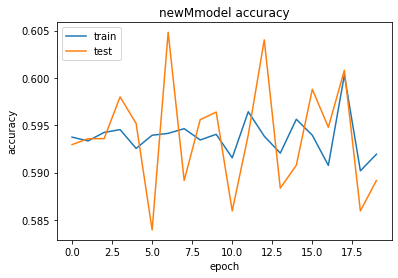

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('newMmodel accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



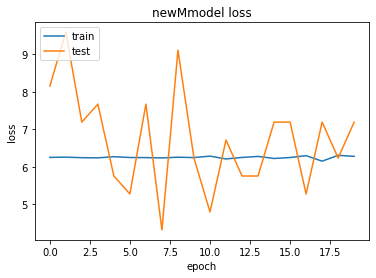

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('newMmodel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [52]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = newModel.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))


Confusion Matrix
[[1498    0]
 [1024    0]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.59      1.00      0.75      1498
        Tamp       0.00      0.00      0.00      1024

    accuracy                           0.59      2522
   macro avg       0.30      0.50      0.37      2522
weighted avg       0.35      0.59      0.44      2522



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
x, y = validation_data.class_indices
print(x, y)


aut tamp
